##### QDateEdit 日期調整元件
QDateEdit 是 PyQt5 裡的日期調整元件，這篇教學會介紹如何在 PyQt5 視窗裡加入 QDateEdit 日期調整元件，並實做透過該元件調整日期並將調整的日期顯示出來的簡單應用。

##### 加入 QDateEdit 日期調整元件 
建立 PyQt5 視窗物件後，透過 QtWidgets.QDateEdit(widget) 方法，就能在指定的元件中建立日期調整元件，調整時，需要先點擊要調整的日期位置，就可以針對該位置的日期進行調整。

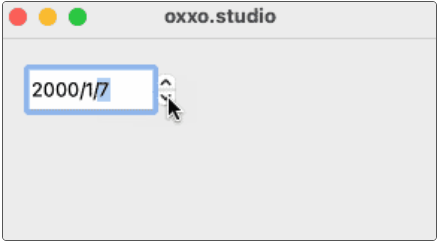

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

date = QtWidgets.QDateEdit(Form)
date.setGeometry(20,20,100,30)

Form.show()
sys.exit(app.exec_())

##### 日期格式設定 
使用 setDisplayFormat() 方法可以調整日期的顯示格式，預設「西元年/月/日」顯示方式的格式為「yyyy/MM/dd」( 注意大小寫不能有錯 )，\
若調整為「dd/MM/yyyy」就會變成「日/月/西元年」，下方的程式碼會列出兩組不同格式的日期調整元件。

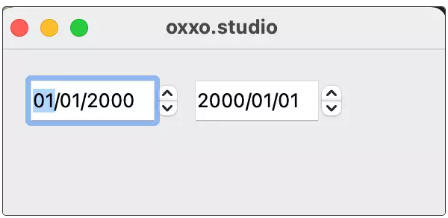

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

d1 = QtWidgets.QDateEdit(Form)
d1.setGeometry(20,20,150,30)
d1.setDisplayFormat('dd/MM/yyyy')

d2 = QtWidgets.QDateEdit(Form)
d2.setGeometry(20,100,150,30)
d2.setDisplayFormat('yyyy/MM/dd')

Form.show()
sys.exit(app.exec_())

如果要設定日期調整的範圍，需要搭配 QtCore.QDate(y, m, d) 方法，下方的程式碼執行後，會將日期調整的範圍限制在 2000/1/1～2000/2/1。

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

d1 = QtWidgets.QDateEdit(Form)
d1.setGeometry(20,20,150,30)
d1.setDisplayFormat('dd/MM/yyyy')
d1.setDateRange(QtCore.QDate(2000, 1, 1), QtCore.QDate(2000, 2, 1))  # 設定日期範圍

Form.show()
sys.exit(app.exec_())

##### 日期調整元件常用方法 
下方列出 QDateEdit 日期調整元件的常用方法：

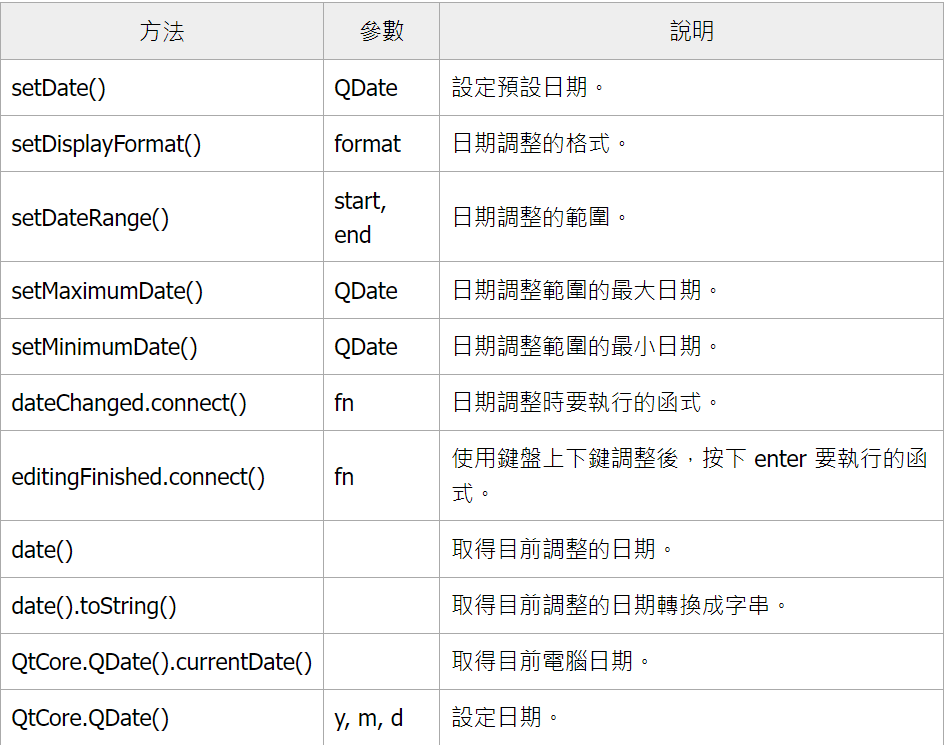

##### 顯示日期調整元件的內容 
運用 dateChanged.connect(fn) 方法，就能在調整時間時，執行特定的函式，下方的程式碼執行後，會透過 QLabel 顯示調整的時間。

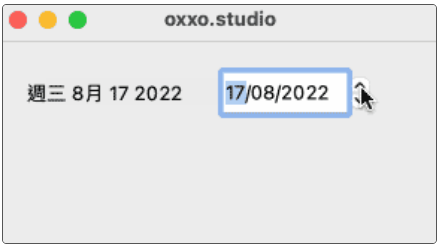

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(20,20,120,30)

def show():
    label.setText(d1.date().toString())

d1 = QtWidgets.QDateEdit(Form)
d1.setGeometry(150,20,100,30)
d1.setDisplayFormat('dd/MM/yyyy')
d1.setDate(QtCore.QDate().currentDate())
d1.dateChanged.connect(show)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 從 PyQt5 中導入 QtWidgets 用於圖形界面元件，QtCore 用於核心功能如日期和時間處理。
from PyQt5 import QtWidgets, QtCore
# 導入 sys 模組，此模組提供了一些對 Python 運行環境的訪問。
import sys

# 定義一個類 MyWidget，繼承自 QtWidgets.QWidget，提供基本的窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 類的初始化方法。
    def __init__(self):
        # super() 函數使得能夠調用父類的方法，這裡是 QWidget 的初始化方法。
        super().__init__()
        # 設置窗口的標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口的尺寸。
        self.resize(300, 200)
        # 調用 ui 方法以進一步設置用戶界面。
        self.ui()

    # ui 方法用於設置窗口內部的控件。
    def ui(self):
        # 創建一個 QLabel 用於顯示文本，並將其父控件設為當前窗口。
        self.label = QtWidgets.QLabel(self)
        # 設置 QLabel 的位置和尺寸。
        self.label.setGeometry(20, 20, 120, 30)

        # 創建一個 QDateEdit 控件用於日期的輸入。
        self.d1 = QtWidgets.QDateEdit(self)
        # 設置 QDateEdit 控件的位置和尺寸。
        self.d1.setGeometry(150, 20, 100, 30)
        # 設置日期顯示格式。
        self.d1.setDisplayFormat('dd/MM/yyyy')
        # 設置 QDateEdit 的初始日期為當前日期。
        self.d1.setDate(QtCore.QDate.currentDate())
        # 當日期改變時，連接到 showMsg 方法。
        self.d1.dateChanged.connect(self.showMsg)

    # showMsg 方法用於處理日期改變時的行為。
    def showMsg(self):
        # 更新 QLabel 的文本以顯示當前選擇的日期。
        self.label.setText(self.d1.date().toString())

# 檢查此腳本是否作為主程序運行。
if __name__ == '__main__':
    # 創建應用程序對象。
    app = QtWidgets.QApplication(sys.argv)
    # 實例化 MyWidget。
    Form = MyWidget()
    # 顯示窗口。
    Form.show()
    # 開始應用程序的事件循環，並在窗口關閉時退出。
    sys.exit(app.exec_())